In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, expand, simplify, lambdify

In [3]:
def diferencias_divididas(x, y):
    """
    Calcula la tabla de diferencias divididas.

    Parámetros:
    x : array de valores x
    y : array de valores y

    Retorna:
    coeficientes : los coeficientes del polinomio de Newton
    """
    n = len(x)
    coeficientes = np.zeros([n, n])
    coeficientes[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            coeficientes[i, j] = (coeficientes[i + 1, j - 1] - coeficientes[i, j - 1]) / (x[i + j] - x[i])

    return coeficientes[0, :]

In [4]:
def newton_polinomio_simbolico(x, coeficientes):
    """
    Construye el polinomio de Newton simbólicamente.

    Parámetros:
    x : array de valores x
    coeficientes : coeficientes del polinomio de Newton (diferencias divididas)

    Retorna:
    polinomio : expresión simbólica del polinomio
    """
    n = len(coeficientes)
    xi = symbols('x')
    polinomio = 0
    producto = 1

    for i in range(n):
        polinomio += coeficientes[i] * producto
        producto *= (xi - x[i])

    return expand(simplify(polinomio))

In [5]:
def newton_interpolacion(x, coeficientes, x_eval):
    """
    Evalúa el polinomio de interpolación de Newton en puntos dados.

    Parámetros:
    x : array de valores x
    coeficientes : coeficientes del polinomio de Newton
    x_eval : valores en los que se evalúa el polinomio

    Retorna:
    valores : valores del polinomio en x_eval
    """
    n = len(coeficientes)
    valores = np.zeros_like(x_eval, dtype=float)

    for i in range(len(x_eval)):
        producto = 1
        for j in range(n):
            valores[i] += coeficientes[j] * producto
            producto *= (x_eval[i] - x[j])

    return valores

In [6]:
# Introduccion de datos
x = np.array([1, 2, 3, 4])  # Valores de x
y = np.array([1, 4, 9, 16])  # Valores de y

In [7]:
# Cálculo de las diferencias divididas
coeficientes = diferencias_divididas(x, y)

In [10]:
# Generar el polinomio simbólico
polinomio_simbolico = newton_polinomio_simbolico(x, coeficientes)
print("El polinomio de interpolación de Newton es:")
print(polinomio_simbolico)

El polinomio de interpolación de Newton es:
1.0*x**2


In [8]:
# Dominio para graficar el polinomio
x_eval = np.linspace(min(x), max(x), 500)
p_eval = newton_interpolacion(x, coeficientes, x_eval)

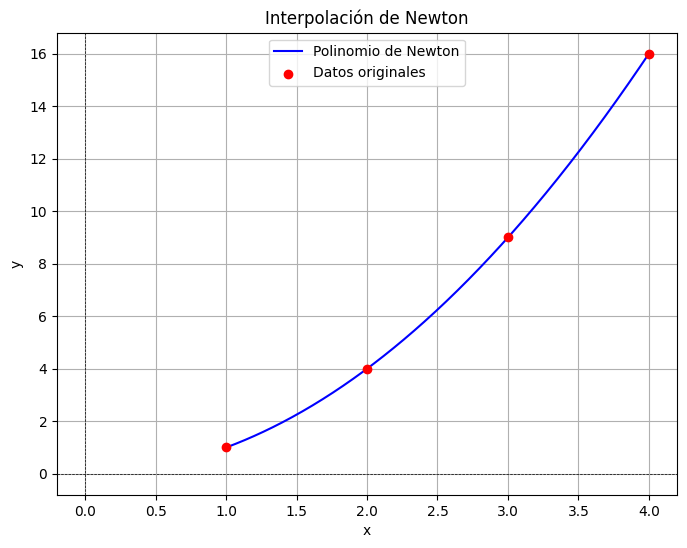

In [9]:
# Gráfica del polinomio y los puntos originales
plt.figure(figsize=(8, 6))
plt.plot(x_eval, p_eval, label="Polinomio de Newton", color="blue")
plt.scatter(x, y, color="red", label="Datos originales", zorder=5)
plt.title("Interpolación de Newton")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend()
plt.grid(True)
plt.show()